# In questo documento andiamo a selezionare le feature singolarmente da ogni documento

In [1]:
# Importiamo le librerie

from os import listdir
from os.path import isfile, join
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import pickle

In [2]:
# Variabili globali

mypath = 'dataset'
listdir(mypath)

['Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv',
 'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv',
 'Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv',
 'Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv',
 'Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv',
 'Friday-16-02-2018_TrafficForML_CICFlowMeter.csv',
 'Friday-23-02-2018_TrafficForML_CICFlowMeter.csv']

In [3]:
# Indice per il file corrente da analizzare 

current = 9

# Questi campi non sono di interesse, quindi li escludiamo dalle analisi

first = []

if current == 5:
    first = ['Dst Port', 'Protocol', 'Timestamp','Flow ID','Src IP','Dst IP']
else:
    first = ['Dst Port', 'Protocol', 'Timestamp']


In [4]:
# Mi vado a prendere i path di tutti i file nella cartella dataset

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [5]:
# Mi creo una cartella image all'interno del quale per ogni file vado a inserire le immagini d'interesse

if not os.path.exists("image"):
    os.makedirs("image")
    for a in onlyfiles:
        b = a.replace('.csv','')
        os.makedirs("image/"+b)
        os.makedirs("image/"+b+"/scatter")
        os.makedirs("image/"+b+"/istogrammi")

# Se non esiste, creo una cartella dove salvare le migliori feature

if not os.path.exists("top_feature"):
    os.makedirs("top_feature")
    for a in onlyfiles:
        b = a.replace('.csv','')
        os.makedirs("top_feature/"+b)

if not os.path.exists("pickle"):
    os.makedirs("pickle")
    for a in onlyfiles:
        b = a.replace('.csv','')
        os.makedirs("pickle/"+b)

# Per ogni documento andiamo a eseguire le operazioni di pre-processing, e a selezionare le feature d'interesse

In [6]:
document= pd.read_csv(mypath+'/'+onlyfiles[current])
scarto = []
scarto.append([])
folder = onlyfiles[current].replace('.csv','')
attaccanti_label = document['Label'].unique()[document['Label'].unique() != 'Label']

In [7]:
document

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,6,23/02/2018 08:18:29,1532698,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1,500,17,23/02/2018 08:17:45,117573855,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786927.5,2.375324e+07,75583006,41990849,Benign
2,500,17,23/02/2018 08:17:45,117573848,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786924.0,2.375325e+07,75583007,41990841,Benign
3,22,6,23/02/2018 08:19:55,1745392,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
4,500,17,23/02/2018 08:18:17,89483474,6,0,3000,0,500,500,...,8,4000364.0,0.0,4000364,4000364,21370777.5,1.528092e+07,41989576,7200485,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,54116,6,23/02/2018 09:00:54,85992425,2,0,0,0,0,0,...,20,0.0,0.0,0,0,85992425.0,0.000000e+00,85992425,85992425,Benign
1048571,33914,6,23/02/2018 12:31:42,132,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1048572,53,17,23/02/2018 12:15:24,79134,1,1,41,98,41,41,...,8,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1048573,3389,6,23/02/2018 12:45:39,10053785,11,12,1321,1659,677,0,...,20,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign


In [8]:
# Andiamo a eliminare i primi 3 campi inutili

for a in first:
    document.drop(columns=a,axis=1,inplace=True)

In [9]:
# Analisi della varianza, eliminiamo tutte le feature che hanno un solo valore

for a in document.head(0):
    
    if(document[a].unique().shape[0] == 1):
        scarto[-1].append(a)
        document.drop(columns=a,axis=1,inplace=True)
    else:
        continue

In [10]:
# Creo un duplicato solo per il plot 

document_plot = document

In [11]:
document = document[document.Label != "Label"]
document_plot = document_plot[document_plot.Label != "Label"]

In [12]:
# Andiamo a eliminare tutti i campi dove sono presenti delle stringhe come valori
'''for label in document.head(0):
    document = document[document[label] != label]
    document_plot = document_plot[document_plot[label] != label]'''

'for label in document.head(0):\n    document = document[document[label] != label]\n    document_plot = document_plot[document_plot[label] != label]'

In [13]:
print(document.shape)

(1048575, 67)


In [14]:
# Andiamo a sostituire le label con valori interi

for b,c in zip(attaccanti_label,range(len(attaccanti_label))):
    document = document.replace(b, c)

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 100)
display(document)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,1532698,11,11,1179,1969,648,0,107.181818,196.245162,976,0,179.000000,364.186491,2053.894505,14.353774,7.298562e+04,9.751916e+04,207592,11,1532698,1.532698e+05,1.066585e+05,246403,20,1325840,1.325840e+05,1.060348e+05,247549,67,0,360,360,7.176887,7.176887,0,976,136.869565,282.793903,79972.391304,0,0,0,1,0,0,0,1,143.090909,107.181818,179.000000,11,1179,11,1969,29200,230,7,32,0.0,0.0,0,0,0.00,0.000000e+00,0,0,0
1,117573855,3,0,1500,0,500,500,500.000000,0.000000,0,0,0.000000,0.000000,12.757938,0.025516,5.878693e+07,2.375324e+07,75583006,41990849,117573855,5.878693e+07,2.375324e+07,75583006,41990849,0,0.000000e+00,0.000000e+00,0,0,0,24,0,0.025516,0.000000,500,500,500.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,666.666667,500.000000,0.000000,3,1500,0,0,-1,-1,2,8,0.0,0.0,0,0,58786927.50,2.375324e+07,75583006,41990849,0
2,117573848,3,0,1500,0,500,500,500.000000,0.000000,0,0,0.000000,0.000000,12.757939,0.025516,5.878692e+07,2.375325e+07,75583007,41990841,117573848,5.878692e+07,2.375325e+07,75583007,41990841,0,0.000000e+00,0.000000e+00,0,0,0,24,0,0.025516,0.000000,500,500,500.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,666.666667,500.000000,0.000000,3,1500,0,0,-1,-1,2,8,0.0,0.0,0,0,58786924.00,2.375325e+07,75583007,41990841,0
3,1745392,11,11,1179,1969,648,0,107.181818,196.245162,976,0,179.000000,364.186491,1803.606296,12.604618,8.311390e+04,1.119720e+05,242608,12,1745392,1.745392e+05,1.211090e+05,275228,20,1509435,1.509435e+05,1.210132e+05,273442,81,0,360,360,6.302309,6.302309,0,976,136.869565,282.793903,79972.391304,0,0,0,1,0,0,0,1,143.090909,107.181818,179.000000,11,1179,11,1969,29200,230,7,32,0.0,0.0,0,0,0.00,0.000000e+00,0,0,0
4,89483474,6,0,3000,0,500,500,500.000000,0.000000,0,0,0.000000,0.000000,33.525744,0.067051,1.789669e+07,1.534523e+07,41989576,4000364,89483474,1.789669e+07,1.534523e+07,41989576,4000364,0,0.000000e+00,0.000000e+00,0,0,0,48,0,0.067051,0.000000,500,500,500.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,583.333333,500.000000,0.000000,6,3000,0,0,-1,-1,5,8,4000364.0,0.0,4000364,4000364,21370777.50,1.528092e+07,41989576,7200485,0
5,89483474,6,0,3000,0,500,500,500.000000,0.000000,0,0,0.000000,0.000000,33.525744,0.067051,1.789669e+07,1.534523e+07,41989575,4000363,89483474,1.789669e+07,1.534523e+07,41989575,4000363,0,0.000000e+00,0.000000e+00,0,0,0,48,0,0.067051,0.000000,500,500,500.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,583.333333,500.000000,0.000000,6,3000,0,0,-1,-1,5,8,4000363.0,0.0,4000363,4000363,21370777.75,1.528091e+07,41989575,7200496,0
6,112641484,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632074e+07,1.117229e+02,56320821,56320663,112641484,5.632074e+07,1.117229e+02,56320821,56320663,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320742.00,1.117229e+02,56320821,56320663,0
7,1566324,11,11,1179,1969,648,0,107.181818,196.245162,976,0,179.000000,364.186491,2009.801293,14.045625,7.458686e+04,9.973364e+04,212619,12,1566324,1.566324e+05,1.089176e+05,249655,19,1354334,1.354334e+05,1.080801e+05,2

In [16]:
# Nel documento sono presenti valori infiniti, li andiamo a sostituire con Nan che verranno successivamente rimossi

document.replace([np.inf, -np.inf], np.nan, inplace=True)
document_plot.replace([np.inf, -np.inf], np.nan, inplace=True)

In [17]:
display(document)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,1532698,11,11,1179,1969,648,0,107.181818,196.245162,976,0,179.000000,364.186491,2053.894505,14.353774,7.298562e+04,9.751916e+04,207592,11,1532698,1.532698e+05,1.066585e+05,246403,20,1325840,1.325840e+05,1.060348e+05,247549,67,0,360,360,7.176887,7.176887,0,976,136.869565,282.793903,79972.391304,0,0,0,1,0,0,0,1,143.090909,107.181818,179.000000,11,1179,11,1969,29200,230,7,32,0.0,0.0,0,0,0.00,0.000000e+00,0,0,0
1,117573855,3,0,1500,0,500,500,500.000000,0.000000,0,0,0.000000,0.000000,12.757938,0.025516,5.878693e+07,2.375324e+07,75583006,41990849,117573855,5.878693e+07,2.375324e+07,75583006,41990849,0,0.000000e+00,0.000000e+00,0,0,0,24,0,0.025516,0.000000,500,500,500.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,666.666667,500.000000,0.000000,3,1500,0,0,-1,-1,2,8,0.0,0.0,0,0,58786927.50,2.375324e+07,75583006,41990849,0
2,117573848,3,0,1500,0,500,500,500.000000,0.000000,0,0,0.000000,0.000000,12.757939,0.025516,5.878692e+07,2.375325e+07,75583007,41990841,117573848,5.878692e+07,2.375325e+07,75583007,41990841,0,0.000000e+00,0.000000e+00,0,0,0,24,0,0.025516,0.000000,500,500,500.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,666.666667,500.000000,0.000000,3,1500,0,0,-1,-1,2,8,0.0,0.0,0,0,58786924.00,2.375325e+07,75583007,41990841,0
3,1745392,11,11,1179,1969,648,0,107.181818,196.245162,976,0,179.000000,364.186491,1803.606296,12.604618,8.311390e+04,1.119720e+05,242608,12,1745392,1.745392e+05,1.211090e+05,275228,20,1509435,1.509435e+05,1.210132e+05,273442,81,0,360,360,6.302309,6.302309,0,976,136.869565,282.793903,79972.391304,0,0,0,1,0,0,0,1,143.090909,107.181818,179.000000,11,1179,11,1969,29200,230,7,32,0.0,0.0,0,0,0.00,0.000000e+00,0,0,0
4,89483474,6,0,3000,0,500,500,500.000000,0.000000,0,0,0.000000,0.000000,33.525744,0.067051,1.789669e+07,1.534523e+07,41989576,4000364,89483474,1.789669e+07,1.534523e+07,41989576,4000364,0,0.000000e+00,0.000000e+00,0,0,0,48,0,0.067051,0.000000,500,500,500.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,583.333333,500.000000,0.000000,6,3000,0,0,-1,-1,5,8,4000364.0,0.0,4000364,4000364,21370777.50,1.528092e+07,41989576,7200485,0
5,89483474,6,0,3000,0,500,500,500.000000,0.000000,0,0,0.000000,0.000000,33.525744,0.067051,1.789669e+07,1.534523e+07,41989575,4000363,89483474,1.789669e+07,1.534523e+07,41989575,4000363,0,0.000000e+00,0.000000e+00,0,0,0,48,0,0.067051,0.000000,500,500,500.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,583.333333,500.000000,0.000000,6,3000,0,0,-1,-1,5,8,4000363.0,0.0,4000363,4000363,21370777.75,1.528091e+07,41989575,7200496,0
6,112641484,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632074e+07,1.117229e+02,56320821,56320663,112641484,5.632074e+07,1.117229e+02,56320821,56320663,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320742.00,1.117229e+02,56320821,56320663,0
7,1566324,11,11,1179,1969,648,0,107.181818,196.245162,976,0,179.000000,364.186491,2009.801293,14.045625,7.458686e+04,9.973364e+04,212619,12,1566324,1.566324e+05,1.089176e+05,249655,19,1354334,1.354334e+05,1.080801e+05,2

In [18]:
# Eliminiamo i valori nulli

document.dropna(inplace=True)
document_plot.dropna(inplace=True)

In [19]:
df1 = document[document.isna().any(axis=1)]
display(df1)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [20]:
# Andiamo a castare tutte le stringhe rimanenti in numeri, in quanto alcuni numeri sono rappresentati come stringhe

for label in document_plot.head(0):
    if(label != 'Label'):
        try:
            document[label] = document[label].astype(float)
            document_plot[label] = document_plot[label].astype(float)
        except:
            print(label)

In [21]:
document.replace([np.inf, -np.inf], np.nan, inplace=True)
document_plot.replace([np.inf, -np.inf], np.nan, inplace=True)

In [22]:
# Dove presenti vanno eliminati i valori str dalle righe

'''indici = []

for a in document.head(0):
    for valore,indice in zip(document[a],document[a].index):
        if type(valore) == str:
            indici.append(indice)


if(len(indici) != 0):
    
    document.drop(indici,inplace=True,axis=0)
    document_plot.drop(indici,inplace=True,axis=0)'''

'indici = []\n\nfor a in document.head(0):\n    for valore,indice in zip(document[a],document[a].index):\n        if type(valore) == str:\n            indici.append(indice)\n\n\nif(len(indici) != 0):\n    \n    document.drop(indici,inplace=True,axis=0)\n    document_plot.drop(indici,inplace=True,axis=0)'

In [23]:
df1 = document[document.isna().any(axis=1)]
display(df1)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [24]:
document.dropna(inplace=True)
document_plot.dropna(inplace=True)

In [25]:
print(document.shape)

(1042867, 67)


In [26]:
# Definisco una funzione per normalizzare i valori

def normalize(feature:str):
    #return (document[feature]-document[feature].mean())/np.std(document[feature])
    #return document[feature]/document[feature].max()
    return (document[feature]-document[feature].min())/(document[feature].max()-document[feature].min())

def normalize_plot(feature:str):
    #return (document_plot[feature]-document_plot[feature].mean())/np.std(document_plot[feature])
    #return document_plot[feature]/document_plot[feature].max()
    return (document_plot[feature]-document_plot[feature].min())/(document_plot[feature].max()-document_plot[feature].min())


# Andiamo a normalizzare i valori per poter usare i vari algoritmi di feature selection

scaled_document = document.head(0)
scaled_document_plot = document_plot.head(0)

for a in document.head(0):
    
    try:
        if document[a].max() != 0 and a != 'Label':
            scaled_document[a] = normalize(a)
            scaled_document_plot[a] = normalize_plot(a)
        else:
            scaled_document[a] = document[a]
            scaled_document_plot[a] = document_plot[a]
    except:

        print(a)
        
        

In [27]:
display(scaled_document)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,1.277248e-02,0.000172,0.000089,0.000745,1.259270e-05,0.098301,0.000000,0.059231,0.139603,0.243270,0.000000,0.097968,0.157226,2.416346e-06,3.584276e-06,6.082532e-04,1.154862e-03,1.730046e-03,0.000019,0.012772,0.001277,0.001260,0.002054,0.000018,1.104868e-02,1.105379e-03,0.001251,2.063865e-03,5.585923e-07,0.0,0.000306,0.000146,1.792080e-06,3.588443e-06,0.000000,0.148058,0.094712,0.212884,0.045320,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.011905,0.074878,0.059231,0.097968,0.000172,0.000745,0.000089,1.259270e-05,0.445572,0.003525,0.006434,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,9.797824e-01,0.000034,0.000000,0.000948,0.000000e+00,0.075850,0.345066,0.276311,0.000000,0.000000,0.000000,0.000000,0.000000,1.500934e-08,2.212011e-09,4.899253e-01,2.812956e-01,6.299024e-01,0.349960,0.979783,0.489925,0.280675,0.629902,0.349960,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.000020,0.000000,4.237378e-09,0.000000e+00,0.392465,0.075850,0.345994,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.348857,0.276311,0.000000,0.000034,0.000948,0.000000,0.000000e+00,0.000000,0.000000,0.001838,0.166667,0.000000,0.0,0.000000,0.000000,0.489925,0.331849,0.629902,0.349948,0
2,9.797823e-01,0.000034,0.000000,0.000948,0.000000e+00,0.075850,0.345066,0.276311,0.000000,0.000000,0.000000,0.000000,0.000000,1.500934e-08,2.212012e-09,4.899253e-01,2.812957e-01,6.299024e-01,0.349960,0.979783,0.489925,0.280675,0.629902,0.349960,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.000020,0.000000,4.237379e-09,0.000000e+00,0.392465,0.075850,0.345994,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.348857,0.276311,0.000000,0.000034,0.000948,0.000000,0.000000e+00,0.000000,0.000000,0.001838,0.166667,0.000000,0.0,0.000000,0.000000,0.489925,0.331849,0.629902,0.349948,0
3,1.454493e-02,0.000172,0.000089,0.000745,1.259270e-05,0.098301,0.000000,0.059231,0.139603,0.243270,0.000000,0.097968,0.157226,2.121890e-06,3.146988e-06,6.926615e-04,1.326019e-03,2.021866e-03,0.000019,0.014545,0.001455,0.001431,0.002294,0.000018,1.257865e-02,1.258446e-03,0.001428,2.279740e-03,6.753131e-07,0.0,0.000306,0.000146,1.573436e-06,3.151155e-06,0.000000,0.148058,0.094712,0.212884,0.045320,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.011905,0.074878,0.059231,0.097968,0.000172,0.000745,0.000089,1.259270e-05,0.445572,0.003525,0.006434,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,7.456958e-01,0.000086,0.000000,0.001896,0.000000e+00,0.075850,0.345066,0.276311,0.000000,0.000000,0.000000,0.000000,0.000000,3.944205e-08,1.259591e-08,1.491495e-01,1.817245e-01,3.499376e-01,0.033357,0.745696,0.149150,0.181324,0.349938,0.033356,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.000041,0.000000,1.462128e-08,0.000000e+00,0.392465,0.075850,0.345994,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.305250,0.276311,0.000000,0.000086,0.001896,0.000000,0.000000e+00,0.000000,0.000000,0.004596,0.166667,0.035348,0.0,0.035348,0.035348,0.178102,0.213485,0.349938,0.060008,0
5,7.456958e-01,0.000086,0.000000,0.001896,0.000

In [28]:
df1 = scaled_document[scaled_document.isna().any(axis=1)]
display(df1)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [29]:
# A questo punto andiamo a salvare gli histogrammi delle varie feature per effettuare analisi visive

for h in scaled_document.head(0):

    # Stampo un istogramma per ogni valori di label, così da avere la suddivisione per colore
    
    for b,c in zip(attaccanti_label,range(len(attaccanti_label))):
        scaled_document[scaled_document['Label'] == c][h].hist(label=str(b))
        
    plt.legend()
    plt.title(h)
    feature_name = h.replace('/','_')
    plt.savefig('image/'+folder+'/'+'istogrammi/'+str(feature_name)+'.png')
    plt.close()

In [30]:
# Vado a suddividere il dataset in x e y per applicare successivamente, i vari algoritmi di feature selection

x_selection = scaled_document.iloc[:,:-1]
y_selection = scaled_document.iloc[:,-1:]

In [31]:
print(y_selection.shape)
print(x_selection.isna().sum().sum())

(1042867, 1)
0


In [32]:

# Applico il test Anova sul dataset

fvalue_Best = SelectKBest(score_func=f_classif, k=10)
fit = fvalue_Best.fit(x_selection, y_selection.astype('int'))

/home/spalazzi/anaconda3/envs/cyber/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# Andiamo a stampare le migliori dieci feature selezionate da Anova su un file csv

features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(x_selection.columns)
feature_score = pd.concat([features,features_score],axis=1)

# Assegniamo un nuovo nome alle colonne

feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(10,columns="F_Score"))

       Input_Features       F_Score
3     TotLen Fwd Pkts  10357.547072
51   Subflow Fwd Byts  10357.547072
56  Fwd Act Data Pkts   7416.015090
34        Pkt Len Min   4287.032788
6     Fwd Pkt Len Min   3951.788399
7    Fwd Pkt Len Mean   2003.186744
48   Fwd Seg Size Avg   2003.186744
63           Idle Std   1282.559582
11   Bwd Pkt Len Mean    840.180876
49   Bwd Seg Size Avg    840.180876


In [34]:
# Mi vado a salvare le migliori 10 feature ottenute dal test Anova con il relativo punteggio

feature_score.nlargest(10,columns="F_Score").to_csv('top_feature/'+folder+'/anova.csv',index=False)

In [35]:
print(x_selection.head(0),y_selection.head(0))

Empty DataFrame
Columns: [Flow Duration, Tot Fwd Pkts, Tot Bwd Pkts, TotLen Fwd Pkts, TotLen Bwd Pkts, Fwd Pkt Len Max, Fwd Pkt Len Min, Fwd Pkt Len Mean, Fwd Pkt Len Std, Bwd Pkt Len Max, Bwd Pkt Len Min, Bwd Pkt Len Mean, Bwd Pkt Len Std, Flow Byts/s, Flow Pkts/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Tot, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Tot, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Fwd PSH Flags, Fwd Header Len, Bwd Header Len, Fwd Pkts/s, Bwd Pkts/s, Pkt Len Min, Pkt Len Max, Pkt Len Mean, Pkt Len Std, Pkt Len Var, FIN Flag Cnt, SYN Flag Cnt, RST Flag Cnt, PSH Flag Cnt, ACK Flag Cnt, URG Flag Cnt, ECE Flag Cnt, Down/Up Ratio, Pkt Size Avg, Fwd Seg Size Avg, Bwd Seg Size Avg, Subflow Fwd Pkts, Subflow Fwd Byts, Subflow Bwd Pkts, Subflow Bwd Byts, Init Fwd Win Byts, Init Bwd Win Byts, Fwd Act Data Pkts, Fwd Seg Size Min, Active Mean, Active Std, Active Max, Active Min, Idle Mean, Idle Std, Idle Max, Idle Min]
Index: 

In [36]:
# Utilizziamo altri metodi di feature extraction per prendere le migliori 10 feature

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x_selection, y_selection.astype('int'))

/tmp/ipykernel_58551/4268670838.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(x_selection, y_selection.astype('int'))


In [37]:
features_score = pd.DataFrame(clf.feature_importances_)
features = pd.DataFrame(x_selection.columns)
feature_score = pd.concat([features,features_score],axis=1)

# Assegniamo un nuovo nome alle colonne

feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(15,columns="F_Score"))

       Input_Features   F_Score
54  Init Fwd Win Byts  0.220947
41       RST Flag Cnt  0.029334
32         Fwd Pkts/s  0.028359
45       ECE Flag Cnt  0.026523
18       Flow IAT Min  0.025936
9     Bwd Pkt Len Max  0.025312
0       Flow Duration  0.024346
19        Fwd IAT Tot  0.024078
56  Fwd Act Data Pkts  0.023959
65           Idle Min  0.023901
17       Flow IAT Max  0.023448
22        Fwd IAT Max  0.023230
50   Subflow Fwd Pkts  0.022807
14        Flow Pkts/s  0.022674
16       Flow IAT Std  0.022562


In [38]:
# Mi vado a salvare le migliori 10 feature ottenute dal test Anova con il relativo punteggio

feature_score.nlargest(10,columns="F_Score").to_csv('top_feature/'+folder+'/ExtraTree.csv',index=False)

In [39]:
# Utilizziamo SVM come metodo di feature selection

features_names = x_selection.head(0)
svm = svm.SVC(kernel='linear',max_iter=400)
svm.fit(x_selection, y_selection.astype('int'))

/home/spalazzi/anaconda3/envs/cyber/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/spalazzi/anaconda3/envs/cyber/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=400)

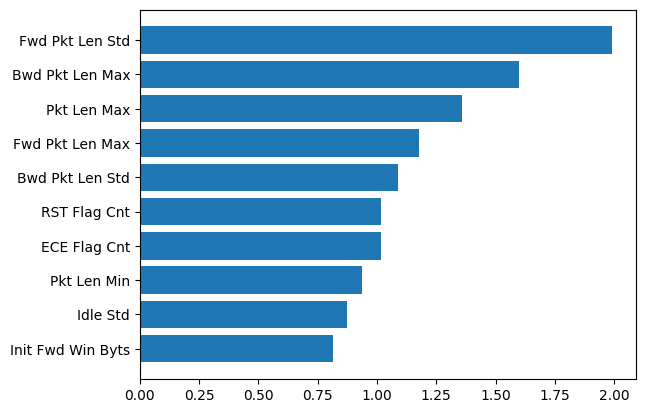

In [40]:
# Questa è una funziona che mi permette di visualizzare le migliori feature

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names[-10:])), imp[-10:], align='center')
    plt.yticks(range(len(names[-10:])), names[-10:])
    plt.show()


f_importances(abs(svm.coef_[0]), features_names)

In [41]:
top_svm = pd.DataFrame()

for a in sorted(zip(abs(svm.coef_[0]),features_names),reverse=True):
    top_svm = pd.concat([top_svm, pd.DataFrame([a])], ignore_index=True)

top_svm.rename(columns = {0:'F_Score', 1:'Input_Features'}, inplace = True)
print(top_svm.head(10))

top_svm.nlargest(10,columns="F_Score").to_csv('top_feature/'+folder+'/SVM.csv',index=False)

    F_Score     Input_Features
0  1.992263    Fwd Pkt Len Std
1  1.600214    Bwd Pkt Len Max
2  1.358872        Pkt Len Max
3  1.176763    Fwd Pkt Len Max
4  1.086863    Bwd Pkt Len Std
5  1.017822       RST Flag Cnt
6  1.017822       ECE Flag Cnt
7  0.936628        Pkt Len Min
8  0.873449           Idle Std
9  0.814036  Init Fwd Win Byts


In [42]:
# Ultimo metodo di feature selection che utilizziamo è quello RFE, che sta per Recorsive Feature Elimination

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
# fit RFE
rfe.fit(x_selection, y_selection.astype('int'))

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

In [43]:
# Andiamo a salvare le feature in un file csv

features_score = pd.DataFrame(rfe.ranking_)
features = pd.DataFrame(x_selection.columns)
feature_score = pd.concat([features,features_score],axis=1)

feature_score.columns = ["Input_Features","F_Score"]
feature_score.sort_values('F_Score',inplace=True,ascending=False,axis=0)
feature_score.nsmallest(10,columns="F_Score").to_csv('top_feature/'+folder+'/RFE.csv',index=False)

In [44]:
# Per non creare un solo file troppo ricco di codice salviamo i dataset in formato pickle 
# per utilizzarlo successivamente in un altro file

with open('pickle/'+folder+'/scaled_document.pickle', 'wb') as handle:
    pickle.dump(scaled_document, handle, protocol=pickle.HIGHEST_PROTOCOL)
    handle.close()
with open('pickle/'+folder+'/scaled_document_plot.pickle', 'wb') as handle:
    pickle.dump(scaled_document_plot, handle, protocol=pickle.HIGHEST_PROTOCOL)
    handle.close()